<a href="https://colab.research.google.com/github/mdhiqbal/scaler_flask_app/blob/master/Donor_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import poisson
from scipy.stats import geom
from scipy.stats import expon
import math as m

In [ ]:
data = pd.read_excel('train_data.xlsx')

In [ ]:
data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [ ]:
data['essay_1_len'] = data['project_essay_1'].str.split().str.len()

In [ ]:
data['essay_2_len'] = data['project_essay_2'].str.split().str.len()
data['essay_3_len'] = data['project_essay_3'].str.split().str.len()
data['essay_4_len'] = data['project_essay_4'].str.split().str.len()

## Univariate Analysis

***Project Essay Length***

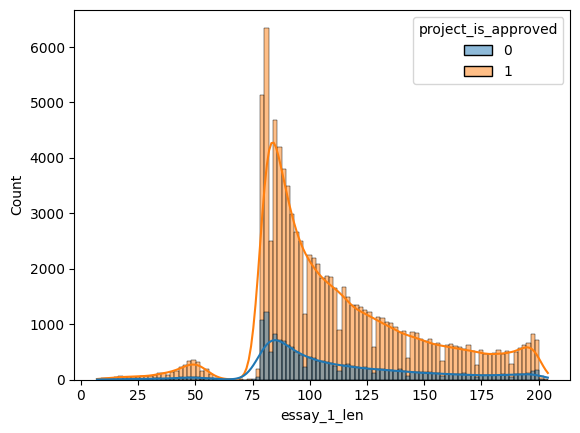

In [ ]:
sns.histplot(data=data, x="essay_1_len",  hue='project_is_approved', kde=True)

plt.show()

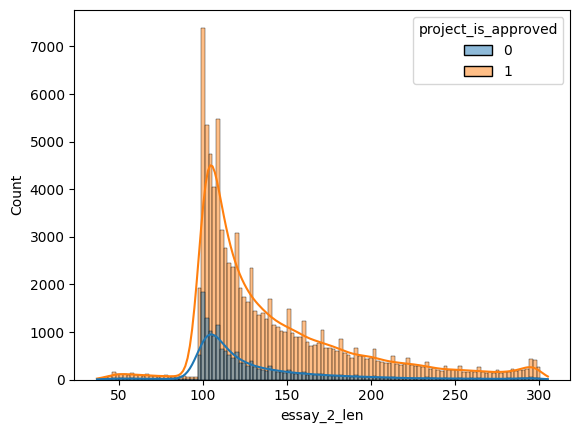

In [ ]:
sns.histplot(data=data, x="essay_2_len",  hue='project_is_approved', kde=True)

plt.show()

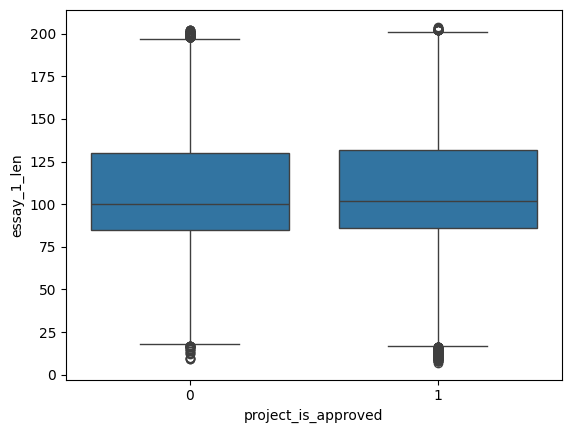

In [ ]:
sns.boxplot(x="project_is_approved", y="essay_1_len", data=data)
plt.show()

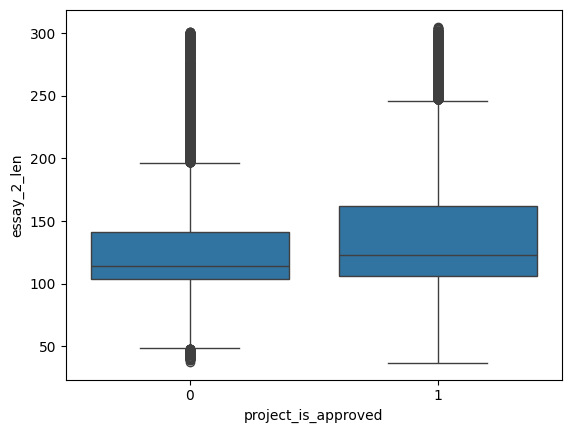

In [ ]:
sns.boxplot(x="project_is_approved", y="essay_2_len", data=data)
plt.show()

***Previously Submitted Projects***

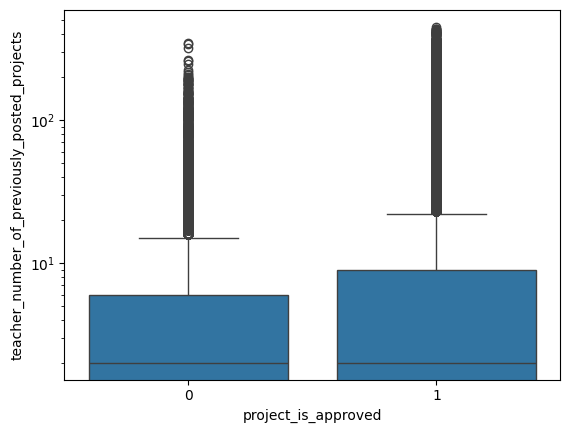

In [ ]:
sns.boxplot(x="project_is_approved", y="teacher_number_of_previously_posted_projects", data=data)
plt.yscale('log')
plt.show()

***Project Cost***

In [ ]:
data_r = pd.read_excel('resources.xlsx')

In [ ]:
data_r.head()

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [ ]:
data_r['Cost'] = data_r['quantity']*data_r['price']

In [ ]:
data_r_grp = data_r.groupby('id')['Cost'].sum().reset_index()

In [ ]:
data = pd.merge(data, data_r_grp, on='id', how='left')

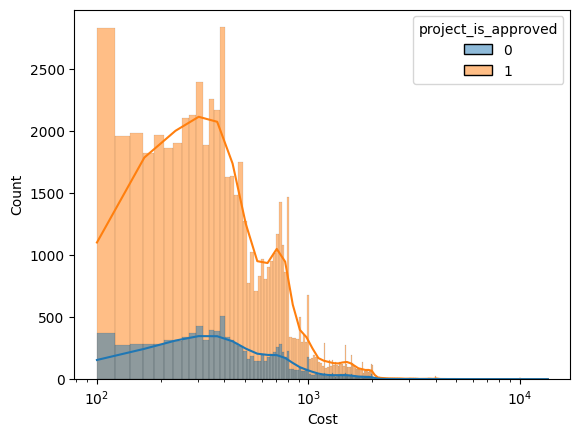

In [ ]:
sns.histplot(data=data, x="Cost",  hue='project_is_approved', kde=True)

plt.xscale("log")

plt.show()

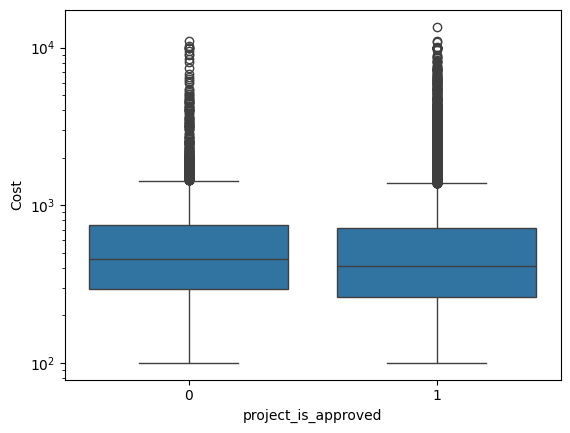

In [ ]:
sns.boxplot(x="project_is_approved", y="Cost", data=data)
plt.yscale('log')
plt.show()

## Bivariate Analysis

In [ ]:
data_location = data.groupby('school_state').agg(approved=('project_is_approved', 'sum'),
                                                 total_submission=('project_is_approved', 'count'),).reset_index()

In [ ]:
data_location['approval_rate'] = data_location['approved']/data_location['total_submission']*100

In [ ]:
import plotly.express as px

In [ ]:
fig = px.choropleth(
    data_location,
    locations='school_state',                # Column with state codes
    locationmode="USA-states",        # Use 2-letter state codes
    color='approval_rate',            # Color by approval rate
    color_continuous_scale="Blues",   # Color scale
    range_color=(0.5, 1.0),           # Set min/max for color scale
    scope="usa",                      # Focus map on USA
    labels={'approval_rate': 'Approval Rate'},
    title="Approval Rates by U.S. State"
)

fig.show()

## Missing Value Imputation

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 21 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   id                                            109248 non-null  object        
 1   teacher_id                                    109248 non-null  object        
 2   teacher_prefix                                109245 non-null  object        
 3   school_state                                  109248 non-null  object        
 4   project_submitted_datetime                    109248 non-null  datetime64[ns]
 5   project_grade_category                        109248 non-null  object        
 6   project_subject_categories                    109248 non-null  object        
 7   project_subject_subcategories                 109248 non-null  object        
 8   project_title                                 109246 n

In [ ]:
data['teacher_prefix'].fillna(data['teacher_prefix'].mode().iloc[0], inplace=True)

<ipython-input-58-d7f7d7270f0e>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
data['project_essay_2'].fillna("", inplace=True)

<ipython-input-60-c3d09550ba0a>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
data['project_essay_3'].fillna("", inplace=True)
data['project_essay_4'].fillna("", inplace=True)

<ipython-input-61-05c1aba0caab>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-61-05c1aba0caab>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [ ]:
data['project_title'].fillna("", inplace=True)

<ipython-input-63-3d4f2dfc074f>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
data['project_resource_summary'].fillna("", inplace=True)

<ipython-input-65-a04c1a5a25f5>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
data['essay_1_len'] = data['project_essay_2'].str.split().str.len()
data['essay_2_len'] = data['project_essay_2'].str.split().str.len()
data['essay_3_len'] = data['project_essay_3'].str.split().str.len()
data['essay_4_len'] = data['project_essay_4'].str.split().str.len()

In [ ]:
data['Cost'].fillna(data['Cost'].median(), inplace=True)

<ipython-input-69-bbf4ea91990e>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 21 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   id                                            109248 non-null  object        
 1   teacher_id                                    109248 non-null  object        
 2   teacher_prefix                                109248 non-null  object        
 3   school_state                                  109248 non-null  object        
 4   project_submitted_datetime                    109248 non-null  datetime64[ns]
 5   project_grade_category                        109248 non-null  object        
 6   project_subject_categories                    109248 non-null  object        
 7   project_subject_subcategories                 109248 non-null  object        
 8   project_title                                 109248 n

## Outlier Treatment Using Winsorization

In [ ]:
data_r_grp_qty = data_r.groupby('id')['quantity'].sum().reset_index()

In [ ]:
data = pd.merge(data, data_r_grp_qty, on='id', how='left')

In [ ]:
data['quantity'].fillna(data['quantity'].median(), inplace=True)

<ipython-input-75-3bbf40fa229c>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
data.to_pickle("data.pkl")

In [ ]:
data_r.to_pickle("data_r.pkl")

In [ ]:
data_r = pd.read_pickle("data_r.pkl")

In [ ]:
data = pd.read_pickle("data.pkl")

In [ ]:
data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay_1_len,essay_2_len,essay_3_len,essay_4_len,Cost,quantity
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,...,,My students need opportunities to practice beg...,0,0,185,185,0,0,419.505,9.0
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,...,,My students need a projector to help with view...,7,1,139,139,0,0,299.000,1.0
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",...,,"My students need shine guards, athletic socks,...",1,0,175,175,0,0,686.680,22.0
3,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,...,,My students need to engage in Reading and Math...,4,1,100,100,0,0,431.900,4.0
4,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,...,,My students need hands on practice in mathemat...,1,1,147,147,0,0,143.960,4.0


In [ ]:
lower = 0
upper = data['Cost'].quantile(0.99)
data['Cost'] = data['Cost'].clip(lower, upper)

In [ ]:
lower = 0
upper = data['quantity'].quantile(0.99)
data['quantity'] = data['quantity'].clip(lower, upper)

## Hypothesis Testing

In [ ]:
data['subject_category'] = data['project_subject_categories'].str.split(",").str[0]

***Impact of project subject category on approval***

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
contingency_table = pd.crosstab(data['subject_category'], data['project_is_approved'])

In [ ]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [ ]:
# Step 3: Output results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

Chi-Square Statistic: 359.7492490820905
p-value: 1.0077109108938764e-73


In [ ]:
if p <= 0.05:
  print('Subject category and approval status are dependent\n')
else:
  print('Subject category and approval status are independent\n')

Subject category and approval status are dependent



***Impact of Teacher Experience on Approval Rates***

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
new_teachers = data[data['teacher_number_of_previously_posted_projects'] == 0]['project_is_approved']
repeat_teachers = data[data['teacher_number_of_previously_posted_projects'] > 0]['project_is_approved']

# Perform independent t-test
t_stat, p_value = ttest_ind(new_teachers, repeat_teachers, equal_var=False)  # Welch’s t-test

# Print results
print("T-statistic:", t_stat)
print("p-value:", p_value)

T-statistic: -14.821017590699288
p-value: 1.3666581964182323e-49


In [ ]:
if p_value <= 0.05:
  print('teachers history with submissions and approval status are dependent\n')
else:
  print('teachers history with submissions and approval status are independent\n')

teachers history with submissions and approval status are dependent



***Project Cost and Approval likelihood***

In [ ]:
r = data['Cost'].corr(data['project_is_approved'], method='pearson')

print("Pearson correlation:", r)

Pearson correlation: -0.04212855496189071


***Impact of essay length on Approval Rate***

In [ ]:
approved_essay_len = data[data['project_is_approved'] == 0]['essay_1_len']
rejected_essay_len = data[data['project_is_approved'] > 0]['essay_1_len']

# Perform independent t-test
t_stat, p_value = ttest_ind(approved_essay_len, rejected_essay_len, equal_var=False)

# Print results
print("T-statistic:", t_stat)
print("p-value:", p_value)

T-statistic: -30.804549307335023
p-value: 1.4057404486302291e-204


In [ ]:
if p_value <= 0.05:
  print('essay length and approval status are dependent\n')
else:
  print('essay length and approval status are independent\n')

essay length and approval status are dependent



In [ ]:
data.to_pickle("data.pkl")

## Model Building Preprocessing

***Missing Value Imputation*** - Already taken care in EDA Step

***Feature Engineering***

In [ ]:
data['teacher_experience'] = np.where(data['teacher_number_of_previously_posted_projects'] > 0, 'First_Time', 'Returning')

In [ ]:
data['month_num'] = data['project_submitted_datetime'].dt.month

In [ ]:
data['weekday_num'] = data['project_submitted_datetime'].dt.weekday

In [ ]:
data_r_grp = data_r.groupby('id')['quantity'].count().reset_index()

In [ ]:
data = pd.merge(data, data_r_grp, on='id', how='left')

In [ ]:
data['quantity_y'].fillna(data['quantity_y'].median(), inplace=True)

<ipython-input-18-59f4194bef1b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['quantity_y'].fillna(data['quantity_y'].median(), inplace=True)


In [ ]:
data['avg_essay_length'] = data[['essay_1_len', 'essay_2_len', 'essay_3_len', 'essay_4_len']].mean(axis=1)

In [ ]:
data.to_pickle("data.pkl")

In [ ]:
data_r.to_pickle("data_r.pkl")

In [ ]:
data = pd.read_pickle("data.pkl")

In [ ]:
data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,...,month_num,weekday_num,quantity_y,avg_essay_length,subject_Health & Sports,subject_History & Civics,subject_Literacy & Language,subject_Math & Science,subject_Music & The Arts,subject_Special Needs
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,1,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,12,0,3.0,92.5,0,0,1,0,0,0
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,3,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,10,1,1.0,69.5,0,1,0,0,0,0
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,3,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,...,8,2,13.0,87.5,1,0,0,1,0,0
3,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,1,"Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,...,10,3,3.0,50.0,0,0,1,0,0,0
4,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,1,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",...,7,0,2.0,73.5,0,0,0,0,0,0


***Feature Encoding***

In [ ]:
def grade_encoding(x):
  if x == 'Grades PreK-2':
    return 1
  elif x == 'Grades 3-5':
    return 2
  elif x == 'Grades 6-8':
    return 3
  elif x == 'Grades 9-12':
    return 4

In [ ]:
data['project_grade_category'] = data['project_grade_category'].apply(grade_encoding)

In [ ]:
def teacher_exp(x):
  if x == 'Returning':
    return 1
  else:
    return 0

In [ ]:
data['teacher_experience'] = data['teacher_experience'].apply(teacher_exp)

In [ ]:
# Example: one-hot encode the 'state' column
data = pd.get_dummies(data, columns=['subject_category'], prefix='subject', drop_first=True)

In [ ]:
data['subject_Health & Sports'] = data['subject_Health & Sports'].astype(int)
data['subject_History & Civics'] = data['subject_History & Civics'].astype(int)
data['subject_Literacy & Language'] = data['subject_Literacy & Language'].astype(int)
data['subject_Math & Science'] = data['subject_Health & Sports'].astype(int)
data['subject_Music & The Arts'] = data['subject_Music & The Arts'].astype(int)
data['subject_Special Needs'] = data['subject_Special Needs'].astype(int)

In [ ]:
data.drop('project_subject_categories', axis = 1, inplace = True)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [ ]:
mdl_data = data.copy()

In [ ]:
mdl_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,essay_1_len,essay_2_len,essay_3_len,essay_4_len,Cost,quantity_x,teacher_experience,month_num,weekday_num,quantity_y,avg_essay_length,subject_Health & Sports,subject_History & Civics,subject_Literacy & Language,subject_Math & Science,subject_Music & The Arts,subject_Special Needs
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,1,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",,,My students need opportunities to practice beg...,0,0,185,185,0,0,419.505,9.0,1,12,0,3.0,92.5,0,0,1,0,0,0
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,3,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,,,My students need a projector to help with view...,7,1,139,139,0,0,299.000,1.0,0,10,1,1.0,69.5,0,1,0,0,0,0
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,3,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,,,"My students need shine guards, athletic socks,...",1,0,175,175,0,0,686.680,22.0,0,8,2,13.0,87.5,1,0,0,1,0,0
3,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,1,"Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,,,My students need to engage in Reading and Math...,4,1,100,100,0,0,431.900,4.0,0,10,3,3.0,50.0,0,0,1,0,0,0
4,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,1,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",,,My students need hands on practice in mathemat...,1,1,147,147,0,0,143.960,4.0,0,7,0,2.0,73.5,0,0,0,0,0,0


In [ ]:
mdl_data.drop('id', axis = 1, inplace = True)

In [ ]:
mdl_data.drop(['id','teacher_id','teacher_prefix','project_submitted_datetime'
              ,'project_subject_subcategories','project_title','project_essay_1'
              ,'project_essay_2','project_essay_3','project_essay_4'
              ,'project_resource_summary','Cost','quantity_x','quantity_y'], axis = 1, inplace = True)

In [ ]:
mdl_data.drop(['school_state'], axis = 1, inplace = True)

In [ ]:
mdl_data.drop(['project_title'], axis = 1, inplace = True)

In [ ]:
mdl_data.to_pickle("mdl_data.pkl")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
bow_matrix = vectorizer.fit_transform(data['project_essay_1'])
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

*AS the above keep getting crashed skipping the text transformation for essay column but the essay lenghts will be used*

In [ ]:
mdl_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis = 1, inplace = True)

In [ ]:
mdl_data.drop(['project_resource_summary'], axis = 1, inplace = True)

In [ ]:
target_means = mdl_data.groupby('school_state')['project_is_approved'].mean()

In [ ]:
mdl_data['school_state'] = mdl_data['school_state'].map(target_means)

In [ ]:
mdl_data.to_pickle("mdl_data.pkl")

In [ ]:
mdl_data = pd.read_pickle("mdl_data.pkl")

In [ ]:
data = pd.read_pickle("data.pkl")

In [ ]:
mdl_data.head()

,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,essay_1_len,essay_2_len,essay_3_len,essay_4_len,teacher_experience,month_num,weekday_num,avg_essay_length,subject_Health & Sports,subject_History & Civics,subject_Literacy & Language,subject_Math & Science,subject_Music & The Arts,subject_Special Needs
0,1,0,0,185,185,0,0,1,12,0,92.5,0,0,1,0,0,0
1,3,7,1,139,139,0,0,0,10,1,69.5,0,1,0,0,0,0
2,3,1,0,175,175,0,0,0,8,2,87.5,1,0,0,1,0,0
3,1,4,1,100,100,0,0,0,10,3,50.0,0,0,1,0,0,0
4,1,1,1,147,147,0,0,0,7,0,73.5,0,0,0,0,0,0


In [ ]:
mdl_data.head()

,school_state,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,essay_1_len,essay_2_len,essay_3_len,essay_4_len,Cost,quantity_x,teacher_experience,month_num,weekday_num,quantity_y,avg_essay_length,subject_Health & Sports,subject_History & Civics,subject_Literacy & Language,subject_Math & Science,subject_Music & The Arts,subject_Special Needs
0,0.845038,1,0,0,185,185,0,0,419.505,9.0,1,12,0,3.0,92.5,0,0,1,0,0,0
1,0.831690,3,7,1,139,139,0,0,299.000,1.0,0,10,1,1.0,69.5,0,1,0,0,0,0
2,0.838379,3,1,0,175,175,0,0,686.680,22.0,0,8,2,13.0,87.5,1,0,0,1,0,0
3,0.863497,1,4,1,100,100,0,0,431.900,4.0,0,10,3,3.0,50.0,0,0,1,0,0,0
4,0.813142,1,1,1,147,147,0,0,143.960,4.0,0,7,0,2.0,73.5,0,0,0,0,0,0


In [ ]:
X = mdl_data.drop('project_is_approved',axis = 1)

In [ ]:
y = mdl_data['project_is_approved']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

***Feature Scaling***

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

##Baseline Model - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score,confusion_matrix, classification_report, f1_score

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8466361556064074

Confusion Matrix:
 [[   12  3304]
 [   47 18487]]

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.00      0.01      3316
           1       0.85      1.00      0.92     18534

    accuracy                           0.85     21850
   macro avg       0.53      0.50      0.46     21850
weighted avg       0.75      0.85      0.78     21850



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Classification Model - Decision Tree

---



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train.head()

,project_grade_category,teacher_number_of_previously_posted_projects,essay_1_len,essay_2_len,essay_3_len,essay_4_len,teacher_experience,month_num,weekday_num,avg_essay_length,subject_Health & Sports,subject_History & Civics,subject_Literacy & Language,subject_Math & Science,subject_Music & The Arts,subject_Special Needs
23690,1,2,165,165,0,0,0,9,4,82.5,1,0,0,1,0,0
32874,1,2,277,277,0,0,0,8,5,138.5,1,0,0,1,0,0
50206,1,0,106,106,0,0,1,12,3,53.0,0,0,0,0,0,0
47892,2,4,124,124,0,0,0,1,0,62.0,0,0,1,0,0,0
10398,3,14,142,142,0,0,0,1,1,71.0,0,1,0,0,0,0


In [ ]:
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=123)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7356064073226545

Confusion Matrix:
 [[  699  2617]
 [ 3160 15374]]

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.21      0.19      3316
           1       0.85      0.83      0.84     18534

    accuracy                           0.74     21850
   macro avg       0.52      0.52      0.52     21850
weighted avg       0.75      0.74      0.74     21850



In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

In [ ]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}


cv_results = cross_validate(dt_model, X, y, cv=kfold, scoring=scoring)

for metric in scoring:
    scores = cv_results[f'test_{metric}']
    print(f"{metric.capitalize()} scores: {scores}")
    print(f"Mean {metric}: {scores.mean():.4f}, Std: {scores.std():.4f}")

Accuracy scores: [0.76270023 0.76324943 0.7617849  0.75788366 0.76140784]
Mean accuracy: 0.7614, Std: 0.0019
Precision scores: [0.85922539 0.86028461 0.85908136 0.8582707  0.85881973]
Mean precision: 0.8591, Std: 0.0007
Recall scores: [0.86149614 0.86079499 0.86042498 0.85604876 0.86025565]
Mean recall: 0.8598, Std: 0.0019
F1 scores: [0.86035927 0.86053972 0.85975265 0.85715829 0.85953709]
Mean f1: 0.8595, Std: 0.0012


In [ ]:
import joblib

In [ ]:
joblib.dump(dt_model, 'dt_model.pkl')

['dt_model.pkl']

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("After SMOTE class distribution:", {label: sum(y_resampled==label) for label in set(y_resampled)})

clf_smote = DecisionTreeClassifier(random_state=42)
clf_smote.fit(X_resampled, y_resampled)
y_pred = clf_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

After SMOTE class distribution: {0: 74172, 1: 74172}
Accuracy: 0.7310755148741419

Confusion Matrix:
 [[  862  2454]
 [ 3422 15112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.26      0.23      3316
           1       0.86      0.82      0.84     18534

    accuracy                           0.73     21850
   macro avg       0.53      0.54      0.53     21850
weighted avg       0.76      0.73      0.74     21850



## Classification Model - Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=123)
model.fit(X_train, y_train)

# 3. Predict on test data
y_pred = model.predict(X_test)

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8441647597254005

Confusion Matrix:
 [[   84  3232]
 [  173 18361]]

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.03      0.05      3316
           1       0.85      0.99      0.92     18534

    accuracy                           0.84     21850
   macro avg       0.59      0.51      0.48     21850
weighted avg       0.77      0.84      0.78     21850



In [ ]:
model = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=123)
model.fit(X_train, y_train)

# 3. Predict on test data
y_pred = model.predict(X_test)

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8464530892448513

Confusion Matrix:
 [[   80  3236]
 [  119 18415]]

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.02      0.05      3316
           1       0.85      0.99      0.92     18534

    accuracy                           0.85     21850
   macro avg       0.63      0.51      0.48     21850
weighted avg       0.78      0.85      0.78     21850



## Classification Model - SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel='rbf', C=1.0, random_state=123)
model.fit(X_train_scaled, y_train)

# 4. Predict and evaluate
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8482379862700229

Confusion Matrix:
 [[    7  3309]
 [    7 18527]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.00      0.00      3316
           1       0.85      1.00      0.92     18534

    accuracy                           0.85     21850
   macro avg       0.67      0.50      0.46     21850
weighted avg       0.80      0.85      0.78     21850



## Classification Model - XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
scale_pos_weight = sum(y_train == 1) / sum(y_train == 0)

In [ ]:
model = XGBClassifier(scale_pos_weight=scale_pos_weight,use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# 3. Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:47:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.84837528604119

Confusion Matrix:
 [[    6  3310]
 [    3 18531]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.00      0.00      3316
           1       0.85      1.00      0.92     18534

    accuracy                           0.85     21850
   macro avg       0.76      0.50      0.46     21850
weighted avg       0.82      0.85      0.78     21850



In [ ]:
mdl_data.head()

,school_state,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,essay_1_len,essay_2_len,essay_3_len,essay_4_len,Cost,quantity_x,teacher_experience,month_num,weekday_num,quantity_y,avg_essay_length,subject_Health & Sports,subject_History & Civics,subject_Literacy & Language,subject_Math & Science,subject_Music & The Arts,subject_Special Needs
0,IN,1,0,0,185,185,0,0,419.505,9.0,1,12,0,3.0,92.5,0,0,1,0,0,0
1,FL,3,7,1,139,139,0,0,299.000,1.0,0,10,1,1.0,69.5,0,1,0,0,0,0
2,AZ,3,1,0,175,175,0,0,686.680,22.0,0,8,2,13.0,87.5,1,0,0,1,0,0
3,KY,1,4,1,100,100,0,0,431.900,4.0,0,10,3,3.0,50.0,0,0,1,0,0,0
4,TX,1,1,1,147,147,0,0,143.960,4.0,0,7,0,2.0,73.5,0,0,0,0,0,0


In [ ]:


# Fit and transform the text column


# Convert to DataFrame for inspection
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# Example: Assume 'state' is the categorical column
encoder = ColumnTransformer([
    ('state_ohe', OneHotEncoder(handle_unknown='ignore'), ['state'])
])

pipeline = make_pipeline(encoder, LogisticRegression())
pipeline.fit(df[['state']], y)

In [ ]:
data['subject_category'].value_counts()

,count
subject_category,
Literacy & Language,45535
Math & Science,25140
Health & Sports,13055
Applied Learning,10035
Music & The Arts,5367
Special Needs,4593
History & Civics,4214
Warmth,1309


In [ ]:
data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,essay_3_len,essay_4_len,Cost,quantity_x,subject_category,teacher_experience,month_num,weekday_num,quantity_y,avg_essay_length
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,1,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,...,0,0,419.505,9.0,Literacy & Language,1,12,0,3.0,92.5
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,3,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,...,0,0,299.000,1.0,History & Civics,0,10,1,1.0,69.5
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,3,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",...,0,0,686.680,22.0,Health & Sports,0,8,2,13.0,87.5
3,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,1,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,...,0,0,431.900,4.0,Literacy & Language,0,10,3,3.0,50.0
4,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,1,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,...,0,0,143.960,4.0,Math & Science,0,7,0,2.0,73.5


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

In [ ]:
tfidf_matrix = vectorizer.fit_transform(data['project_essay_1'])

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
tfidf_matrix

NameError: name 'tfidf_matrix' is not defined

In [ ]:
  # Removes common stopwords

# Step 2: Fit and transform the text data


# Step 3: Convert to DataFrame for easy inspection


,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,...,essay_3_len,essay_4_len,Cost,quantity_x,subject_category,teacher_experience,month_num,weekday_num,quantity_y,avg_essay_length
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,...,0,0,419.505,9.0,Literacy & Language,Returning,12,0,3.0,92.5
1,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,...,0,0,299.000,1.0,History & Civics,First_Time,10,1,1.0,69.5
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",...,0,0,686.680,22.0,Health & Sports,First_Time,8,2,13.0,87.5
3,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,...,0,0,431.900,4.0,Literacy & Language,First_Time,10,3,3.0,50.0
4,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,...,0,0,143.960,4.0,Math & Science,First_Time,7,0,2.0,73.5
